In [1]:
import pandas as pd

data = pd.read_csv("Data.csv")
#These are the values most likely to change
xField = "Year"
yField = "Europe"

for i in data.columns:
    data[i] = pd.to_numeric(data[i], errors="coerce")

data = data.dropna(subset=[yField])
data.head()

,Year,United States,Europe,France,China,India,Japan
0,2006,NaN,98.0,NaN,NaN,NaN,NaN
1,2007,NaN,173.0,NaN,NaN,NaN,NaN
2,2008,NaN,279.0,15.0,NaN,NaN,NaN
3,2009,NaN,422.0,24.0,NaN,NaN,NaN
4,2010,NaN,588.0,38.0,NaN,NaN,NaN


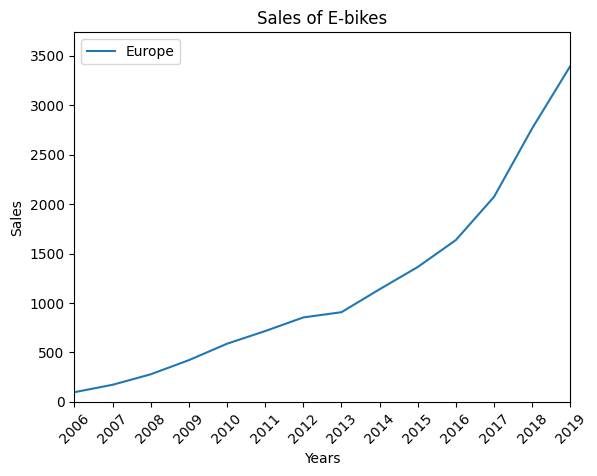

In [2]:
from matplotlib import pyplot as plt

def plotting(x, y):
    #These are the values most likely to change
    plt.title("Sales of E-bikes")
    plt.xlabel("Years")
    plt.ylabel("Sales")

    plt.xlim(x.iloc[0], x.iloc[-1])
    plt.ylim(0, max(y) * 1.1)
    plt.xticks(x[::1], rotation=45, fontsize=10)

    plt.legend(loc="upper left")

plt.plot(data[xField], data[yField], label=yField)
plotting(data[xField], data[yField])

Min BIC value: 186.7387752397547 at degree: 10


Text(0.5, 1.0, 'BIC vs. Degree')

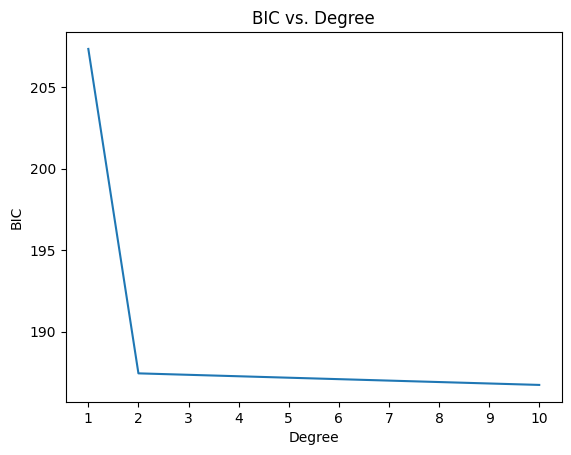

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from statsmodels import api as sm

#Max degrees is 93 (remember of overfitting)
degreeMax = 10
BICList = []
for i in range(1, degreeMax + 1):
    polynomial = PolynomialFeatures(degree=i)
    xTransformed = polynomial.fit_transform(data[[xField]])

    testingModel = sm.OLS(data[yField], sm.add_constant(xTransformed)).fit()
    BICList.append(testingModel.bic)

minValue = min(BICList)
print(f"Min BIC value: {minValue} at degree: {BICList.index(minValue) + 1}")

plt.plot(range(1, degreeMax + 1), BICList)
plt.xlabel("Degree")
plt.xticks(range(1, degreeMax + 1))
plt.ylabel("BIC")
plt.title("BIC vs. Degree")

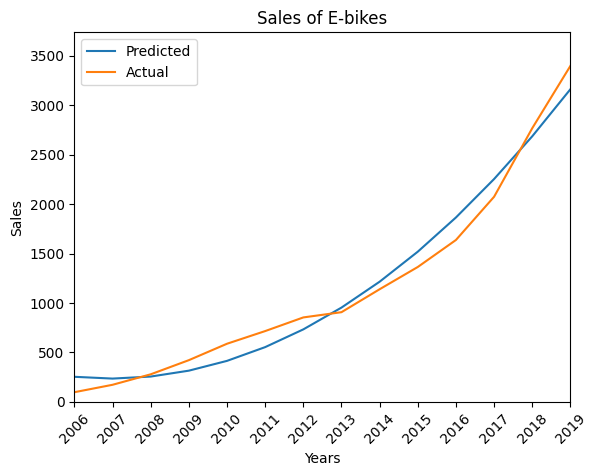

In [42]:
degree = 10
polynomial = PolynomialFeatures(degree=degree)
xTransformed = polynomial.fit_transform(data[[xField]])
model = sm.OLS(data[yField], sm.add_constant(xTransformed)).fit()

prediction = model.predict(xTransformed)
predictionTable = pd.DataFrame({xField: data[xField], yField: prediction})

plt.plot(predictionTable[xField], predictionTable[yField], label="Predicted")
plt.plot(data[xField], data[yField], label="Actual")
plotting(data[xField], data[yField])

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(data[yField], predictionTable[yField]))
mean = data[yField].mean()
print(f"Mean: {mean}, RMSE: {rmse}, Score: {1 - rmse / mean}")

Mean: 1172.5, RMSE: 143.67406507980684, Score: 0.8774634839404633


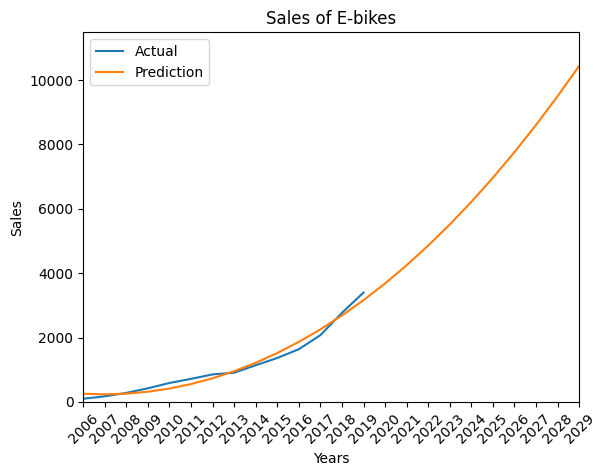

In [44]:
from numpy import arange

furtureAmount = 10
xRange = arange(data[xField].iloc[0], data[xField].iloc[-1] + furtureAmount + 1, 1)
xTransformed = polynomial.fit_transform(pd.DataFrame({xField: xRange}))
futurePredictedValue = model.predict(xTransformed)
predictionTable = pd.DataFrame({xField: xRange, yField: futurePredictedValue})

plt.plot(data[xField], data[yField], label="Actual")
plt.plot(predictionTable[xField], predictionTable[yField], label="Prediction")

plotting(predictionTable[xField], predictionTable[yField])